In [2]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 42


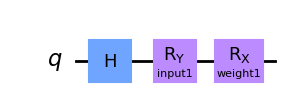

In [3]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

In [6]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [11]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import StatevectorEstimator as Estimator
import inspect

estimator = Estimator()
estimator_qnn = EstimatorQNN(
    circuit=qc1,
    observables=observable1,
    input_params=[params1[0]],
    weight_params=[params1[1]],
    estimator=estimator,
)
estimator_qnn
inspect.signature(EstimatorQNN.__init__)
# help(EstimatorQNN)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


<Signature (self, *, circuit: 'QuantumCircuit', estimator: 'BaseEstimator | BaseEstimatorV2 | None' = None, observables: 'Sequence[BaseOperator] | BaseOperator | None' = None, input_params: 'Sequence[Parameter] | None' = None, weight_params: 'Sequence[Parameter] | None' = None, gradient: 'BaseEstimatorGradient | None' = None, input_gradients: 'bool' = False, default_precision: 'float' = 0.015625, pass_manager: 'BasePassManager | None' = None)>

In [12]:
### random input, random weight
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 1 
Input: [0.77395605]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.43887844]


In [13]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.28517779]
 [0.30622676]].  
Shape: (2, 1)


In [17]:
estimator_qnn.input_gradients = True
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.3038852]]].  
Shape: [[[0.3038852]]]
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)
